In [2]:
# task 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('DS2_C5_S1_Income_Data_Practice.csv')
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [3]:
# task 2

print(df.shape)
df.describe()

(32561, 14)


,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# task 3

df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [5]:
# task 4

df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [6]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

In [7]:
df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [8]:
label_encoder = preprocessing.LabelEncoder()

for j in df.columns:
    if df[j].dtype == 'category':
        df[j] = label_encoder.fit_transform(df[j])

In [9]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    ndf = df.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(ndf.to_numpy()),columns=ndf.columns)
    return df_scaled

In [10]:
sdf = feature_scale('minmax')
sdf

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.096500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.094827,0.733333,0.533333,1.000000,0.071429,0.8,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,0.000000,0.0,0.193878,0.951220,0.0


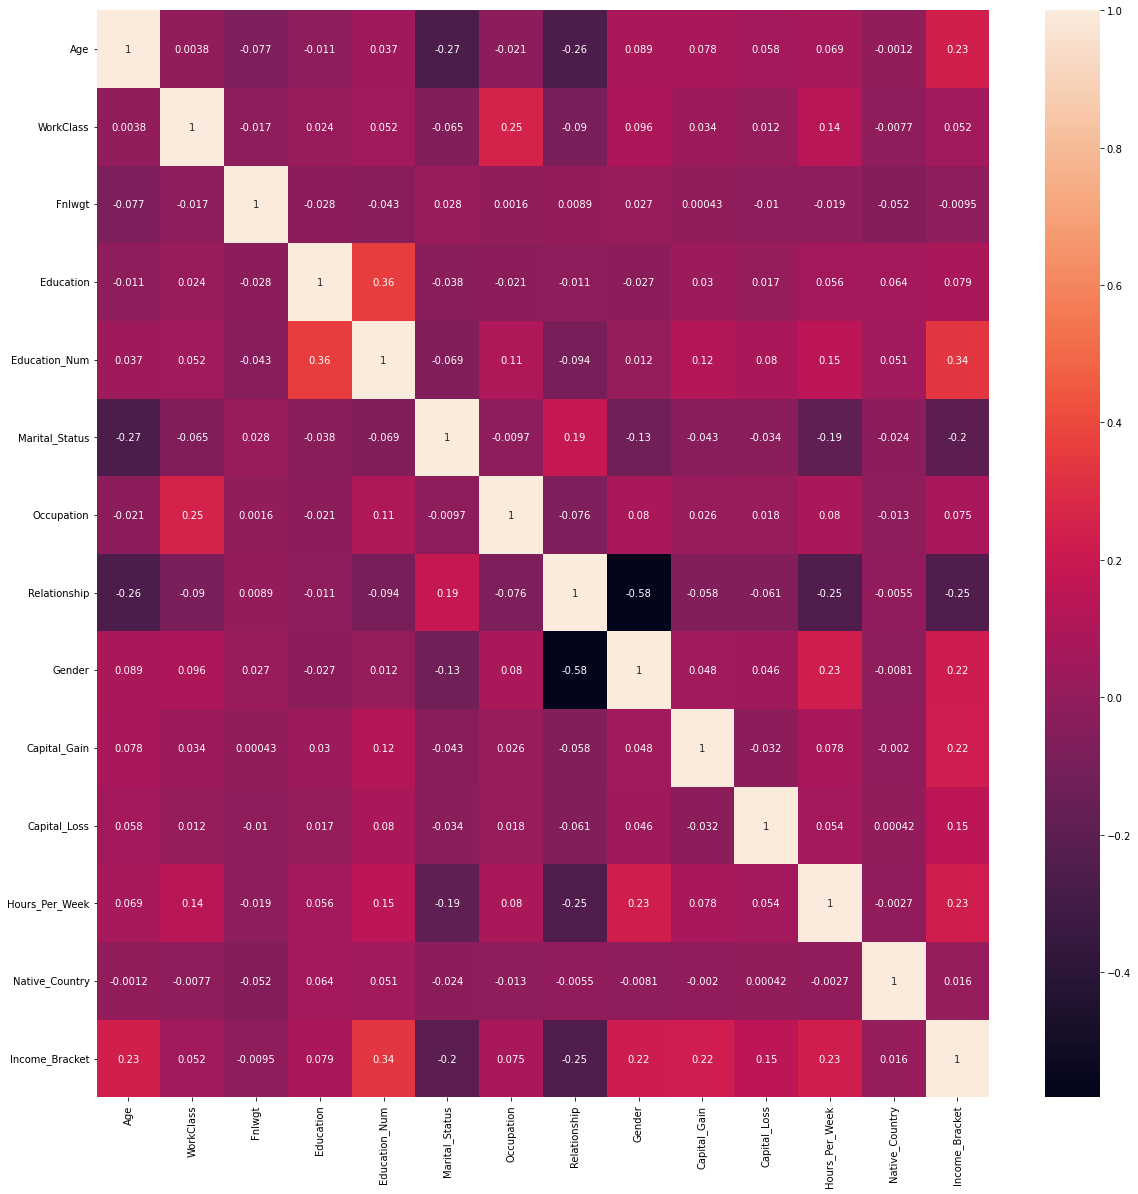

In [11]:
plt.figure(figsize = (20, 20))
sns.heatmap(sdf.corr(), annot = True);

In [13]:
c = len(sdf)
train_num = int(0.7 * c)
sdf_train = sdf.iloc[:train_num,:]
sdf_test = sdf.iloc[train_num:,:]
sdf_train.shape, sdf_test.shape

((22792, 14), (9769, 14))

In [14]:
y = sdf['Income_Bracket']
X = sdf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (22792, 14) , (9769, 14)


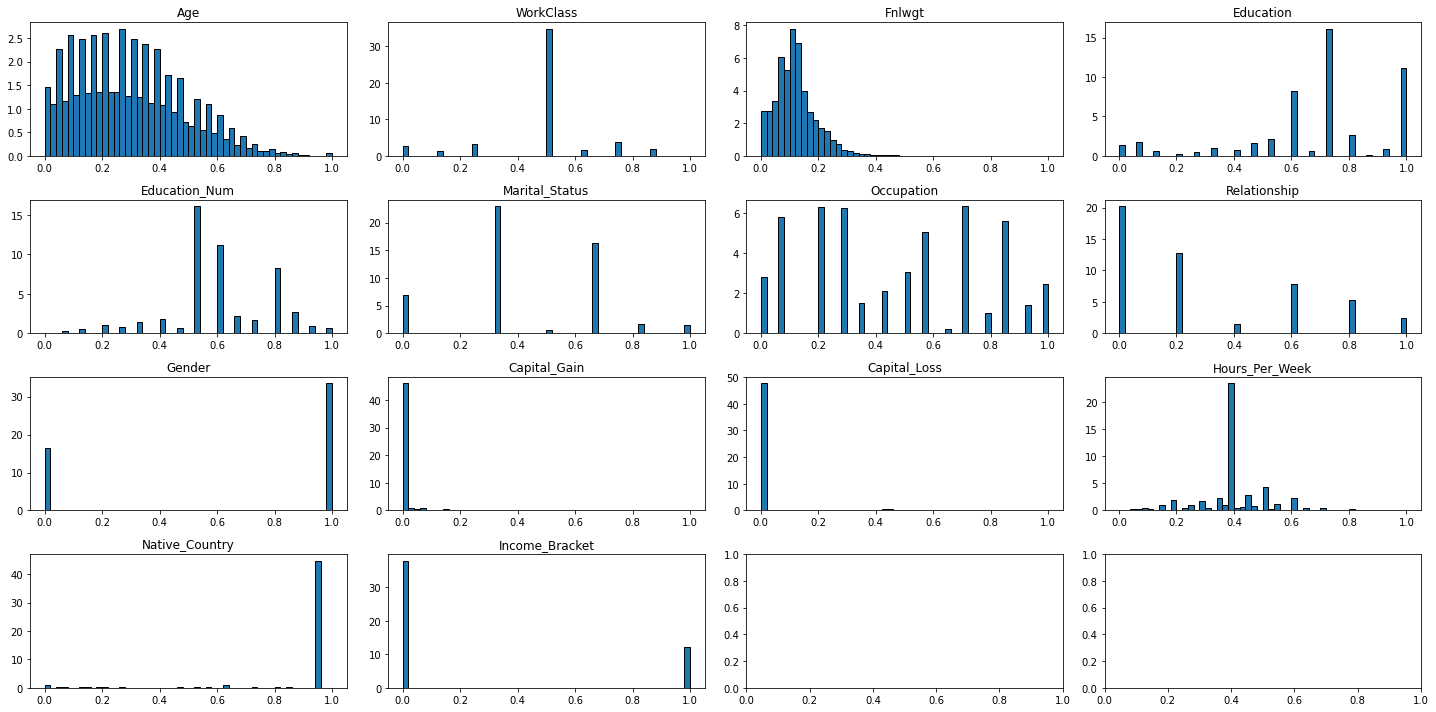

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

sdfn = sdf.select_dtypes(include=numerics)
numeric_cols=sdfn.columns
num_cols=4
n_bins = 50

# compute number of rows for plot 
num_rows = int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(sdfn[col],bins=n_bins,density=True, edgecolor = 'black')
    ax.set_title(col)

plt.show()

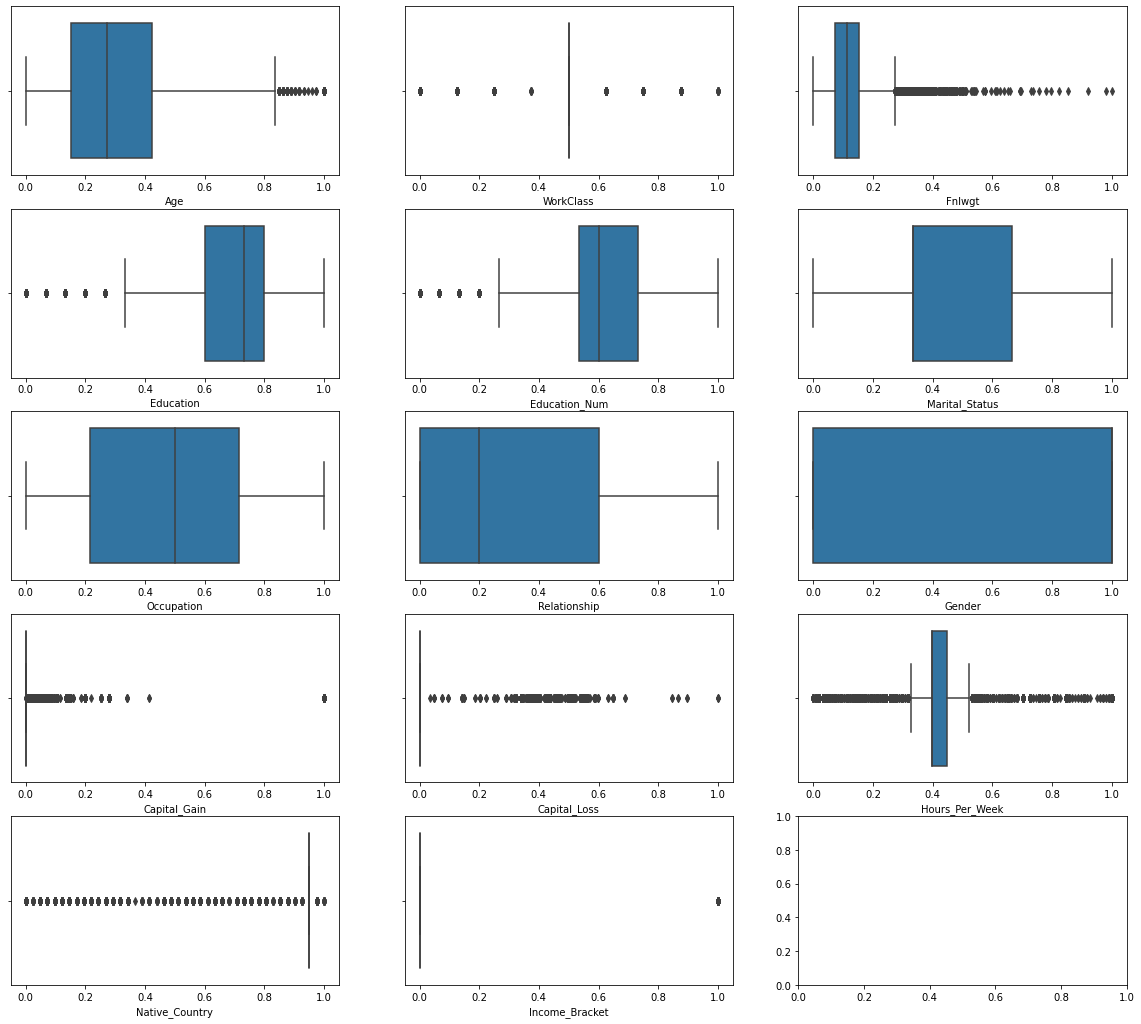

In [19]:
fig, axs = plt.subplots(5,3,figsize=(20,18))
for col,i in zip(sdfn.columns,axs.flatten()):
    
    sns.boxplot(x=sdfn[col], ax = i)

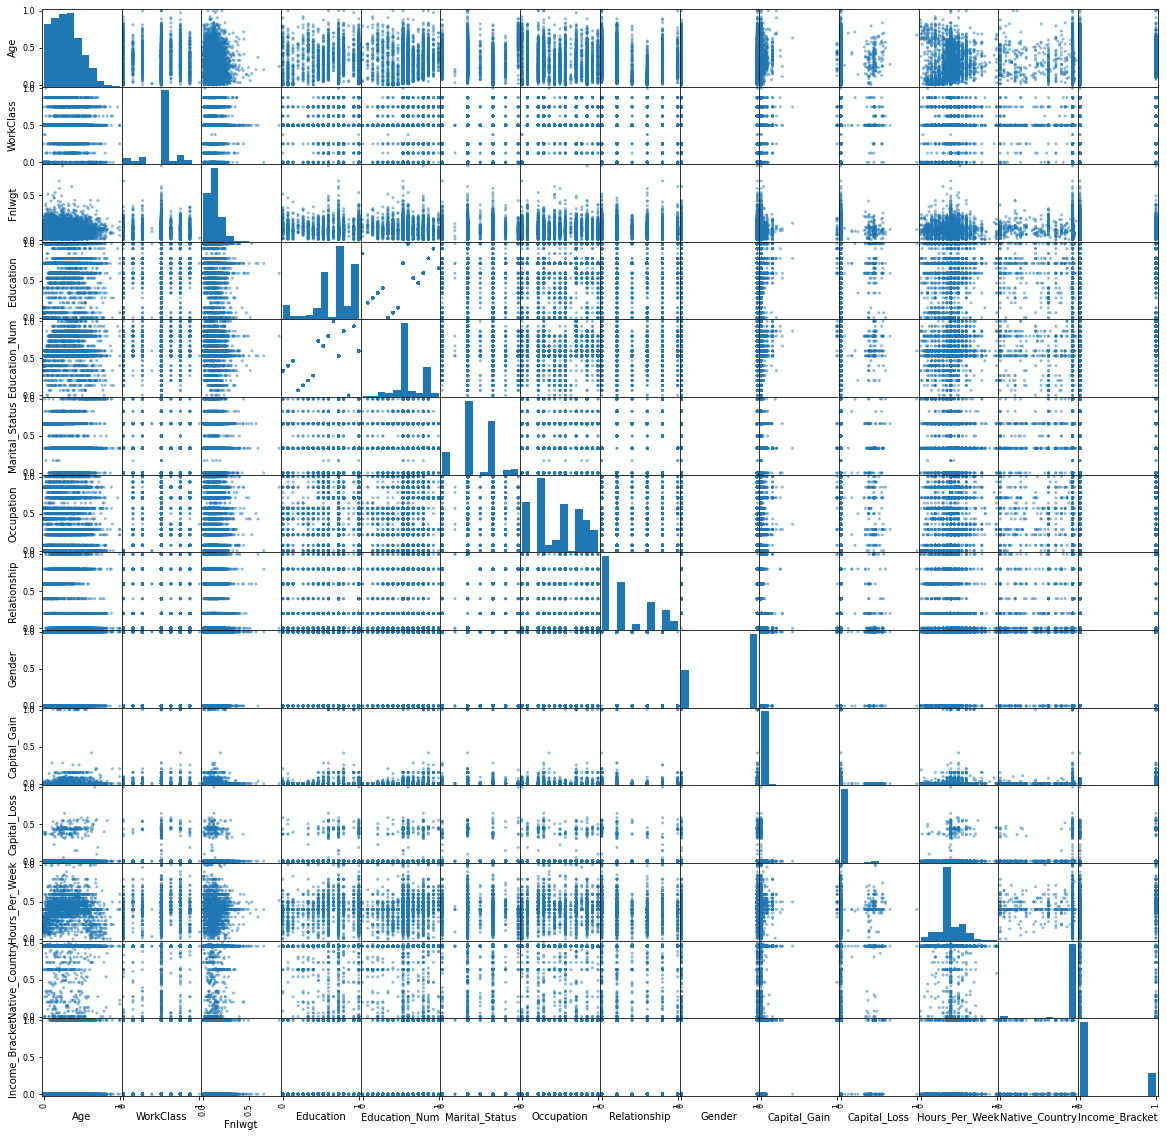

In [20]:
pd.plotting.scatter_matrix(sdf[numeric_cols].sample(4000),figsize=(20,20))
plt.show()